# Association Analysis
## Frequent Itemset Mining using Apriori Algorithm

### Importing Libaries

In [37]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
%matplotlib inline

### Reading Data

In [38]:
df = pd.read_csv('retail_data.csv', sep=',')

In [39]:
df.head(5)

,0,1,2,3,4,5,6
0,Bread,Wine,Eggs,Meat,Cheese,Pencil,Diaper
1,Bread,Cheese,Meat,Diaper,Wine,Milk,Pencil
2,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
3,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
4,Meat,Pencil,Wine,NaN,NaN,NaN,NaN


Each row of the dataset represents items that were purchased together on the same day at same store.

The dataset is a **sparse dataset** as relatively high percentage of data is NA or NAN or equivalent. 

Let's see all the unique items in the dataset.

In [40]:
items = (df['0'].unique())
items

array(['Bread', 'Cheese', 'Meat', 'Eggs', 'Wine', 'Bagel', 'Pencil',
       'Diaper', 'Milk'], dtype=object)

### Data Preprocessing

To make use of the apriori module given by mlxtend library, we need to convert the dataset according to it's liking.
apriori module requires a dataframe that has either 0 and 1 or True and False as data. 
The data we have is all string (name of items), we need to **One Hot Encode** the data.

##### Custom One Hot Encoding

In [41]:
encoded_vals = []
for index, row in df.iterrows():
    labels = {}
    uncommons = list(set(items) - set(row))
    commons = list(set(items).intersection(row))
    for uc in uncommons:
        labels[uc] = 0
    for com in commons:
        labels[com] = 1
    encoded_vals.append(labels)
encoded_vals

[{'Bagel': 0,
  'Milk': 0,
  'Diaper': 1,
  'Wine': 1,
  'Eggs': 1,
  'Bread': 1,
  'Meat': 1,
  'Pencil': 1,
  'Cheese': 1},
 {'Eggs': 0,
  'Bagel': 0,
  'Diaper': 1,
  'Wine': 1,
  'Milk': 1,
  'Bread': 1,
  'Meat': 1,
  'Pencil': 1,
  'Cheese': 1},
 {'Diaper': 0,
  'Bagel': 0,
  'Pencil': 0,
  'Bread': 0,
  'Wine': 1,
  'Eggs': 1,
  'Milk': 1,
  'Meat': 1,
  'Cheese': 1},
 {'Diaper': 0,
  'Bagel': 0,
  'Pencil': 0,
  'Bread': 0,
  'Wine': 1,
  'Eggs': 1,
  'Milk': 1,
  'Meat': 1,
  'Cheese': 1},
 {'Diaper': 0,
  'Eggs': 0,
  'Milk': 0,
  'Bread': 0,
  'Bagel': 0,
  'Cheese': 0,
  'Meat': 1,
  'Wine': 1,
  'Pencil': 1},
 {'Meat': 0,
  'Cheese': 0,
  'Diaper': 1,
  'Wine': 1,
  'Eggs': 1,
  'Milk': 1,
  'Bread': 1,
  'Pencil': 1,
  'Bagel': 1},
 {'Diaper': 0,
  'Milk': 0,
  'Bread': 0,
  'Meat': 0,
  'Bagel': 0,
  'Wine': 1,
  'Pencil': 1,
  'Cheese': 1,
  'Eggs': 1},
 {'Meat': 0,
  'Wine': 0,
  'Cheese': 0,
  'Eggs': 0,
  'Diaper': 1,
  'Milk': 1,
  'Bread': 1,
  'Pencil': 1,
  'Bage

Let's have a look at the One Hot Encoded dataset.


In [42]:
ohe_df = pd.DataFrame(encoded_vals)
ohe_df.head(3)

,Bagel,Milk,Diaper,Wine,Eggs,Bread,Meat,Pencil,Cheese
0,0,0,1,1,1,1,1,1,1
1,0,1,1,1,0,1,1,1,1
2,0,1,0,1,1,0,1,0,1


The first observation from original dataset:
['Bread', 'Wine','Eggs', 'Meat', 'Cheese', 'Pencil', 'Diaper']

Take a look at first observation in our one hot encoded dataframe. Do you think OHE worked?

### Applying Apriori


apriori module from mlxtend library provides fast and efficient apriori implementation.  <br>
<br>
> **apriori(df, min_support=0.5, use_colnames=False, max_len=None, verbose=0, low_memory=False)**

##### Parameters
- ` df ` : One-Hot-Encoded DataFrame or DataFrame that has 0 and 1 or True and False as values
- ` min_support ` : Floating point value between 0 and 1 that indicates the mininmum support required for an itemset to be selected. <br>
<center> $ # of observation with item / total observation $ </center>
- ` use_colnames ` : This allows to preserve column names for itemset making it more readable.
- ` max_len ` : Max length of itemset generated. If not set, all possible lengths are evaluated.
- ` verbose ` : Shows the number of iterations if >= 1 and low_memory is True. If =1 and low_memory is False , shows the number of combinations.
- ` low_memory ` : <div style="text-align:justify">If True, uses an iterator to search for combinations above min_support. Note that while low_memory=True should only be used for large dataset if memory resources are limited, because this implementation is approx. 3-6x slower than the default.</div>

In [43]:
freq_items = apriori(ohe_df, min_support=0.2, use_colnames=True, verbose=1)
freq_items

Processing 141 combinations | Sampling itemset size 3


/Users/chinmay/miniconda3/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.425397,(Bagel)
1,0.501587,(Milk)
2,0.406349,(Diaper)
3,0.438095,(Wine)
4,0.438095,(Eggs)
5,0.504762,(Bread)
6,0.476190,(Meat)
7,0.361905,(Pencil)
8,0.501587,(Cheese)
9,0.225397,"(Bagel, Milk)"


In [44]:
rules = association_rules(freq_items, metric="confidence", min_threshold=0.6)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Bagel),(Bread),0.425397,0.504762,0.279365,0.656716,1.301042,0.064641,1.442650,0.402687
1,(Milk),(Cheese),0.501587,0.501587,0.304762,0.607595,1.211344,0.053172,1.270148,0.350053
2,(Cheese),(Milk),0.501587,0.501587,0.304762,0.607595,1.211344,0.053172,1.270148,0.350053
3,(Wine),(Cheese),0.438095,0.501587,0.269841,0.615942,1.227986,0.050098,1.297754,0.330409
4,(Eggs),(Meat),0.438095,0.476190,0.266667,0.608696,1.278261,0.058050,1.338624,0.387409
5,(Eggs),(Cheese),0.438095,0.501587,0.298413,0.681159,1.358008,0.078670,1.563203,0.469167
6,(Meat),(Cheese),0.476190,0.501587,0.323810,0.680000,1.355696,0.084958,1.557540,0.500891
7,(Cheese),(Meat),0.501587,0.476190,0.323810,0.645570,1.355696,0.084958,1.477891,0.526414
8,"(Meat, Milk)",(Cheese),0.244444,0.501587,0.203175,0.831169,1.657077,0.080564,2.952137,0.524816
9,"(Meat, Cheese)",(Milk),0.323810,0.501587,0.203175,0.627451,1.250931,0.040756,1.337845,0.296655


### Visualizing results

1. **Support vs Confidence**

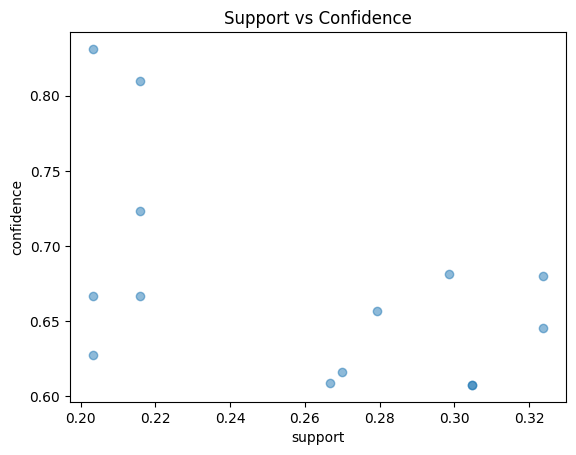

In [45]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

### a) If you are a store manager, what actions will you take to decide which set of results above look meaningful? 

#### 1. Examine Frequent Itemsets (from freq_items):

* Support Values: The manager should look at the support values of itemsets. Higher support means these items are purchased together more frequently.

* Filter by Minimum Support: We may want to set a cutoff for minimum support to focus on the most relevant itemsets.

*  Item Combinations: We should also pay attention to combinations of items that may not be intuitively obvious. These could reveal unique purchasing behaviors.

In [57]:
# Identify item combinations with higher support values
high_support_threshold = 0.3  # Adjust this threshold as needed
high_support_itemsets = freq_items[freq_items['support'] >= high_support_threshold].sort_values(["support"],ascending=False)

print("\nItemsets with High Support (Greater than", high_support_threshold, "):")
print(high_support_itemsets)


Itemsets with High Support (Greater than 0.3 ):
     support        itemsets
5   0.504762         (Bread)
1   0.501587          (Milk)
8   0.501587        (Cheese)
6   0.476190          (Meat)
3   0.438095          (Wine)
4   0.438095          (Eggs)
0   0.425397         (Bagel)
2   0.406349        (Diaper)
7   0.361905        (Pencil)
29  0.323810  (Meat, Cheese)
15  0.304762  (Milk, Cheese)


In [58]:
print("\nItem Combinations that May Reveal Unique Purchasing Behaviors:")
for index, row in high_support_itemsets.iterrows():
    itemset = row['itemsets']
    support = row['support']
    print(f"Itemset: {itemset}, Support: {support}")


Item Combinations that May Reveal Unique Purchasing Behaviors:
Itemset: frozenset({'Bread'}), Support: 0.5047619047619047
Itemset: frozenset({'Milk'}), Support: 0.5015873015873016
Itemset: frozenset({'Cheese'}), Support: 0.5015873015873016
Itemset: frozenset({'Meat'}), Support: 0.47619047619047616
Itemset: frozenset({'Wine'}), Support: 0.4380952380952381
Itemset: frozenset({'Eggs'}), Support: 0.4380952380952381
Itemset: frozenset({'Bagel'}), Support: 0.4253968253968254
Itemset: frozenset({'Diaper'}), Support: 0.40634920634920635
Itemset: frozenset({'Pencil'}), Support: 0.3619047619047619
Itemset: frozenset({'Meat', 'Cheese'}), Support: 0.3238095238095238
Itemset: frozenset({'Milk', 'Cheese'}), Support: 0.3047619047619048


In [63]:
rules.sort_values(['confidence'],ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
8,"(Meat, Milk)",(Cheese),0.244444,0.501587,0.203175,0.831169,1.657077,0.080564,2.952137,0.524816
11,"(Meat, Eggs)",(Cheese),0.266667,0.501587,0.215873,0.809524,1.613924,0.082116,2.616667,0.518717
13,"(Eggs, Cheese)",(Meat),0.298413,0.476190,0.215873,0.723404,1.519149,0.073772,1.893773,0.487091
5,(Eggs),(Cheese),0.438095,0.501587,0.298413,0.681159,1.358008,0.078670,1.563203,0.469167
6,(Meat),(Cheese),0.476190,0.501587,0.323810,0.680000,1.355696,0.084958,1.557540,0.500891
10,"(Milk, Cheese)",(Meat),0.304762,0.476190,0.203175,0.666667,1.400000,0.058050,1.571429,0.410959
12,"(Meat, Cheese)",(Eggs),0.323810,0.438095,0.215873,0.666667,1.521739,0.074014,1.685714,0.507042
0,(Bagel),(Bread),0.425397,0.504762,0.279365,0.656716,1.301042,0.064641,1.442650,0.402687
7,(Cheese),(Meat),0.501587,0.476190,0.323810,0.645570,1.355696,0.084958,1.477891,0.526414
9,"(Meat, Cheese)",(Milk),0.323810,0.501587,0.203175,0.627451,1.250931,0.040756,1.337845,0.296655


2. Confidence and Lift of the Rules:

    A higher confidence means a higher likelihood of the consequent item being purchased when the antecedent item is purchased.
    Lift indicates how much more likely the consequent is purchased when the antecedent is bought, compared to its normal sale rate. A lift greater than 1 indicates that the antecedent and consequent are more likely to be bought together than separately.

* Direction of Associations:

    Understanding which items are antecedents and which are consequents can help in planning strategies like product placements and promotions.


b) How and What actions will the manager be able to take to improve sales, order inventory and ensure items are accessible easily?


#### Frequent Itemsets Insights:

* High Demand Products: Items like Milk, Bread, and Cheese are in high demand as they appear frequently. Ensure these items are always in stock.

* Product Bundling: Create bundles for items that frequently appear together, such as Meat and Cheese, or Milk and Cheese.

* Promotional Displays: Place items that are commonly purchased together in close proximity, like Meat, Eggs, and Cheese or Wine and Cheese.

#### Association Rules Insights:

* Targeted Marketing: Use rules to target customers with specific offers. For example, customers buying Meat might be interested in Cheese, as suggested by the rule (Meat) ⇒ (Cheese).

* Cross-Selling Opportunities: Encourage customers buying one item to buy a related item. For example, when a customer buys Eggs, suggest purchasing Meat or Cheese, as indicated by the rules (Eggs) ⇒ (Meat) and (Eggs) ⇒ (Cheese).

* Inventory Prioritization: The rules suggest prioritizing the stocking of items like Cheese, Milk, and Meat, as they are often bought together with other items.

* Pricing Strategies: Adjust pricing or offer discounts on combinations of products that are frequently bought together, like offering a discount on Cheese when bought with Milk.

* Store Layout Optimization: Rearrange the store layout to place items with strong associations (like Meat and Cheese) near each other for customer convenience.

# own dataset

In [1]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

####  A retail transaction dataset is taken for the section of custom dataset.

In [2]:
df = pd.read_csv("OnlineRetail.csv")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,FinalPrice,InvoiceMonth,Day of week
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26,2.95,17850.0,UNITED KINGDOM,17.7,December,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26,3.75,17850.0,UNITED KINGDOM,22.5,December,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26,4.15,17850.0,UNITED KINGDOM,33.2,December,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26,3.75,17850.0,UNITED KINGDOM,22.5,December,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART,6,2010-12-01 08:26,4.25,17850.0,UNITED KINGDOM,25.5,December,Wednesday


In [3]:
# Filter out missing values and negative quantities (which might be returns)
filtered_data = df[df['Quantity'] > 0].dropna(subset=['InvoiceNo', 'Description'])

# Grouping the products purchased in each transaction
grouped_data = filtered_data.groupby('InvoiceNo')['Description'].apply(list)

# Converting the dataset into the right format for the Apriori algorithm
transaction_list = grouped_data.values
te = TransactionEncoder()
te_ary = te.fit(transaction_list).transform(transaction_list)
transformed_data = pd.DataFrame(te_ary, columns=te.columns_)

# Displaying the transformed data
transformed_data.head()

,*USB OFFICE MIRROR BALL,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Taking min_support=0.05, and min_confidence = 0.5

In [4]:
frequent_itemsets = apriori(transformed_data, min_support=0.05, use_colnames=True)
frequent_itemsets.sort_values(["support"],ascending=False).head(20)

,support,itemsets
32,0.114451,(WHITE HANGING HEART T-LIGHT HOLDER)
7,0.106022,(JUMBO BAG RED RETROSPOT)
25,0.088860,(REGENCY CAKESTAND 3 TIER)
21,0.085559,(PARTY BUNTING)
14,0.079415,(LUNCH BAG RED RETROSPOT)
1,0.073779,(ASSORTED COLOUR BIRD ORNAMENT)
27,0.070326,(SET OF 3 CAKE TINS PANTRY DESIGN)
19,0.066873,(PACK OF 72 RETROSPOT CAKE CASES)
16,0.065198,(LUNCH BAG SUKI DESIGN)
11,0.064639,(LUNCH BAG BLACK SKULL)


In [5]:
rules = association_rules(frequent_itemsets, metric = 'confidence', min_threshold=0.5)
rules.sort_values(["confidence"],ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


### Taking min_support=0.02, and min_confidence = 0.6

In [6]:
frequent_itemsets = apriori(transformed_data, min_support=0.02, use_colnames=True)
frequent_itemsets.sort_values(["support"],ascending=False).head(20)

,support,itemsets
280,0.114451,(WHITE HANGING HEART T-LIGHT HOLDER)
105,0.106022,(JUMBO BAG RED RETROSPOT)
201,0.088860,(REGENCY CAKESTAND 3 TIER)
161,0.085559,(PARTY BUNTING)
130,0.079415,(LUNCH BAG RED RETROSPOT)
15,0.073779,(ASSORTED COLOUR BIRD ORNAMENT)
222,0.070326,(SET OF 3 CAKE TINS PANTRY DESIGN)
153,0.066873,(PACK OF 72 RETROSPOT CAKE CASES)
132,0.065198,(LUNCH BAG SUKI DESIGN)
125,0.064639,(LUNCH BAG BLACK SKULL)


In [7]:
rules = association_rules(frequent_itemsets, metric = 'confidence', min_threshold=0.6)
rules.sort_values(["confidence"],ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
23,"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...",(GREEN REGENCY TEACUP AND SAUCER),0.030365,0.051437,0.027470,0.904682,17.588167,0.025908,9.951591,0.972679
25,"(PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY...",(ROSES REGENCY TEACUP AND SAUCER),0.032091,0.054077,0.027470,0.856013,15.829402,0.025735,6.569485,0.967887
6,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.038844,0.051437,0.032091,0.826144,16.061279,0.030093,5.456020,0.975636
27,"(JUMBO BAG PINK POLKADOT, JUMBO STORAGE BAG SUKI)",(JUMBO BAG RED RETROSPOT),0.026150,0.106022,0.020971,0.801942,7.563908,0.018198,4.513712,0.891095
19,(PINK REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.038844,0.054077,0.030365,0.781699,14.455199,0.028264,4.333119,0.968439
9,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.051437,0.054077,0.038946,0.757157,14.001361,0.036164,3.895202,0.978932
5,(GARDENERS KNEELING PAD CUP OF TEA),(GARDENERS KNEELING PAD KEEP CALM),0.038489,0.046359,0.027724,0.720317,15.537695,0.025940,3.409715,0.973094
8,(ROSES REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.054077,0.051437,0.038946,0.720188,14.001361,0.036164,3.389999,0.981664
26,(PINK REGENCY TEACUP AND SAUCER),"(ROSES REGENCY TEACUP AND SAUCER, GREEN REGENC...",0.038844,0.038946,0.027470,0.707190,18.158267,0.025957,3.282171,0.983117
24,"(ROSES REGENCY TEACUP AND SAUCER, GREEN REGENC...",(PINK REGENCY TEACUP AND SAUCER),0.038946,0.038844,0.027470,0.705346,18.158267,0.025957,3.261975,0.983221


### Taking min_support=0.03, and min_confidence = 0.5

In [8]:
frequent_itemsets = apriori(transformed_data, min_support=0.03, use_colnames=True)
frequent_itemsets.sort_values(["support"],ascending=False).head(20)

,support,itemsets
128,0.114451,(WHITE HANGING HEART T-LIGHT HOLDER)
54,0.106022,(JUMBO BAG RED RETROSPOT)
102,0.088860,(REGENCY CAKESTAND 3 TIER)
88,0.085559,(PARTY BUNTING)
71,0.079415,(LUNCH BAG RED RETROSPOT)
8,0.073779,(ASSORTED COLOUR BIRD ORNAMENT)
111,0.070326,(SET OF 3 CAKE TINS PANTRY DESIGN)
82,0.066873,(PACK OF 72 RETROSPOT CAKE CASES)
73,0.065198,(LUNCH BAG SUKI DESIGN)
67,0.064639,(LUNCH BAG BLACK SKULL)


In [9]:
rules = association_rules(frequent_itemsets, metric = 'confidence', min_threshold=0.5)
rules.sort_values(["confidence"],ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.038844,0.051437,0.032091,0.826144,16.061279,0.030093,5.456020,0.975636
12,(PINK REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.038844,0.054077,0.030365,0.781699,14.455199,0.028264,4.333119,0.968439
5,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.051437,0.054077,0.038946,0.757157,14.001361,0.036164,3.895202,0.978932
4,(ROSES REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.054077,0.051437,0.038946,0.720188,14.001361,0.036164,3.389999,0.981664
6,(JUMBO BAG PINK POLKADOT),(JUMBO BAG RED RETROSPOT),0.061846,0.106022,0.041840,0.676519,6.380921,0.035283,2.763617,0.898875
0,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.049761,0.053367,0.032497,0.653061,12.237286,0.029842,2.728532,0.966370
3,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.051437,0.038844,0.032091,0.623889,16.061279,0.030093,2.555514,0.988588
8,(JUMBO STORAGE BAG SUKI),(JUMBO BAG RED RETROSPOT),0.060120,0.106022,0.036762,0.611486,5.767536,0.030388,2.301021,0.879491
1,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.053367,0.049761,0.032497,0.608944,12.237286,0.029842,2.429929,0.970051
7,(JUMBO SHOPPER VINTAGE RED PAISLEY),(JUMBO BAG RED RETROSPOT),0.059663,0.106022,0.034528,0.578723,5.458515,0.028203,2.122069,0.868625


# Analysis

### Analysis of Frequent Itemsets

* The most frequent item in your dataset is the "WHITE HANGING HEART T-LIGHT HOLDER" with a support of approximately 11.4%. This indicates that it's a popular product among customers.

* Other popular items include "JUMBO BAG RED RETROSPOT" and "REGENCY CAKESTAND 3 TIER", each with substantial support values, suggesting their frequent purchase.

### Analysis of Association Rules

* The rule with the highest confidence (about 82.6%) is between "PINK REGENCY TEACUP AND SAUCER" and "GREEN REGENCY TEACUP AND SAUCER". This high confidence suggests a strong association between the purchase of these two items.

* Similarly, the other high-confidence rules involve combinations of different types of "REGENCY TEACUP AND SAUCER" and "JUMBO BAGS", indicating that customers who buy one variant often buy another.

### Impact of Minimum Support and Minimum Confidence

* Minimum Support: Lowering this threshold would result in more itemsets being considered as 'frequent'. This could reveal subtler associations but also increases the risk of including not genuine relationships. If we set the minimum support too high, we might miss out on significant but less frequent associations.

* Minimum Confidence: Adjusting this threshold affects the strength of the associations. Example in case of min_support=0.05, and min_confidence = 0.5 we didnt find any rule which are more than 0.5  confindece. A higher confidence threshold leads to stronger, more reliable rules but might exclude potentially interesting but less obvious associations. Conversely, a lower threshold includes more rules but increases the risk of including less reliable ones.